In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Charger le fichier CSV depuis votre ordinateur
uploaded = files.upload()

Saving Task 3 and 4_Loan_Data.csv to Task 3 and 4_Loan_Data.csv


In [ ]:
# Lisez le fichier CSV en utilisant pandas
df = pd.read_csv("Task 3 and 4_Loan_Data.csv")

# Affichez le contenu du fichier CSV
print(df)

      customer_id  credit_lines_outstanding  loan_amt_outstanding  \
0         8153374                         0           5221.545193   
1         7442532                         5           1958.928726   
2         2256073                         0           3363.009259   
3         4885975                         0           4766.648001   
4         4700614                         1           1345.827718   
...           ...                       ...                   ...   
9995      3972488                         0           3033.647103   
9996      6184073                         1           4146.239304   
9997      6694516                         2           3088.223727   
9998      3942961                         0           3288.901666   
9999      5533570                         1           1917.652480   

      total_debt_outstanding       income  years_employed  fico_score  default  
0                3915.471226  78039.38546               5         605        0  
1        

In [ ]:

# Afficher les premières lignes du DataFrame
print(df.head())

# Afficher les informations sur les colonnes et les types de données
print(df.info())

# Statistiques descriptives des données numériques
print(df.describe())

# Vérifier s'il y a des valeurs manquantes
print(df.isnull().sum())

# Vérifier s'il y a des valeurs dupliquées
print(df.duplicated().sum())


   customer_id  credit_lines_outstanding  loan_amt_outstanding  \
0      8153374                         0           5221.545193   
1      7442532                         5           1958.928726   
2      2256073                         0           3363.009259   
3      4885975                         0           4766.648001   
4      4700614                         1           1345.827718   

   total_debt_outstanding       income  years_employed  fico_score  default  
0             3915.471226  78039.38546               5         605        0  
1             8228.752520  26648.43525               2         572        1  
2             2027.830850  65866.71246               4         602        0  
3             2501.730397  74356.88347               5         612        0  
4             1768.826187  23448.32631               6         631        0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                 

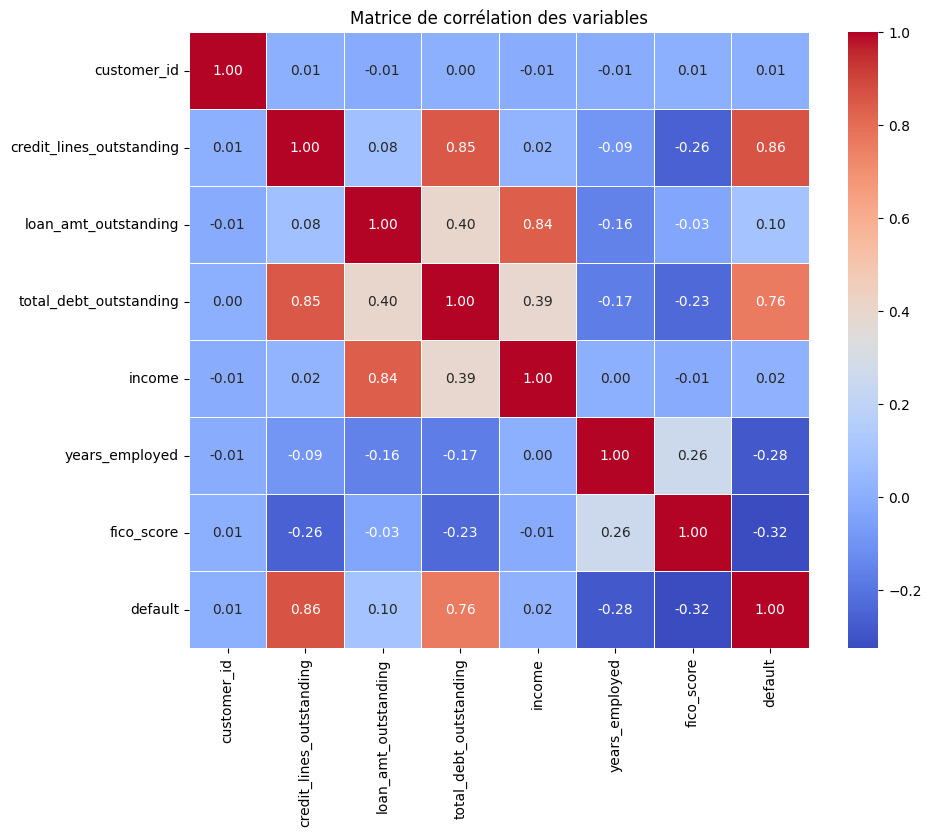

In [ ]:
import seaborn as sns

# Calculer la matrice de corrélation
correlation_matrix = df.corr()

# Visualiser la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Matrice de corrélation des variables")
plt.show()


In [ ]:
# Tri des corrélations par ordre décroissant
sorted_correlations = correlation_matrix['default'].sort_values(ascending=False)

# Affichage des corrélations triées
print("Corrélations des variables avec 'default' (de la plus positive à la plus négative) :")
print(sorted_correlations)


Corrélations des variables avec 'default' (de la plus positive à la plus négative) :
default                     1.000000
credit_lines_outstanding    0.862815
total_debt_outstanding      0.758868
loan_amt_outstanding        0.098978
income                      0.016309
customer_id                 0.006927
years_employed             -0.284506
fico_score                 -0.324515
Name: default, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Diviser les données en ensembles d'entraînement et de test
X = df.drop(columns=['default'])
y = df['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer un modèle d'arbre de décision
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Évaluer les performances du modèle sur l'ensemble de test
y_pred = tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Analyser l'importance des variables dans le modèle
importances = tree_model.feature_importances_
feature_importance = pd.Series(importances, index=X.columns)
sorted_feature_importance = feature_importance.sort_values(ascending=False)
print("\nImportance des variables :")
print(sorted_feature_importance)


Accuracy: 0.996

Importance des variables :
credit_lines_outstanding    0.898509
years_employed              0.068706
fico_score                  0.018756
total_debt_outstanding      0.005149
customer_id                 0.004748
loan_amt_outstanding        0.002610
income                      0.001521
dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Diviser les données en ensembles d'entraînement et de test
X = df.drop('default', axis=1)  # Features
y = df['default']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le modèle de régression logistique
model = LogisticRegression()
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

print("Accuracy :", accuracy)
print("Precision :", precision)
print("Recall :", recall)
print("F1-score :", f1)
print("AUC-ROC :", auc_roc)


Accuracy : 0.9845
Precision : 0.9648093841642229
Recall : 0.9454022988505747
F1-score : 0.9550072568940494
AUC-ROC : 0.9690691881662074


In [ ]:
def expected_loss(principal, default_prob, recovery_rate=0.10):
    """
    Calculates the expected loss on a loan given the principal amount,
    the predicted default probability, and the recovery rate.

    Args:
    principal (float): The principal amount of the loan.
    default_prob (float): The predicted probability of default.
    recovery_rate (float, optional): The recovery rate, expressed as a decimal.
                                     Defaults to 0.10 (10%).

    Returns:
    float: The expected loss on the loan.
    """
    return principal * default_prob * (1 - recovery_rate)


In [ ]:
# Sélection du premier client du fichier de données
client_data = df.iloc[0]

# Extraction des caractéristiques du client
principal_loan_amount = client_data['loan_amt_outstanding']
predicted_default_probability = 0.3  # Nous devrons remplacer cette valeur par la probabilité de défaut prédite par notre modele appliqué au client selectionné.

# Calcul de la perte attendue sur le prêt
loss = expected_loss(principal_loan_amount, predicted_default_probability)

print("Perte attendue sur le prêt du premier client :", loss)


Perte attendue sur le prêt du premier client : 1409.81720211
